In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.interpolate import griddata

In [2]:
## load data

directory = "./Re additional data WLM under shear"
filenames = os.listdir(directory)
filenames.sort(key=lambda x: int(x.split('.')[0]))
print(filenames)

data_list = []

for filename in filenames:
    with open(directory + "/" + filename, "r") as f:
        data = f.readlines()
        data = [line.split() for line in data]
        data = np.array(data, dtype=float)
        data_list.append(data)

['462308.dat', '462309.dat', '462318.dat', '462321.dat', '462330.dat', '462333.dat', '462339.dat']


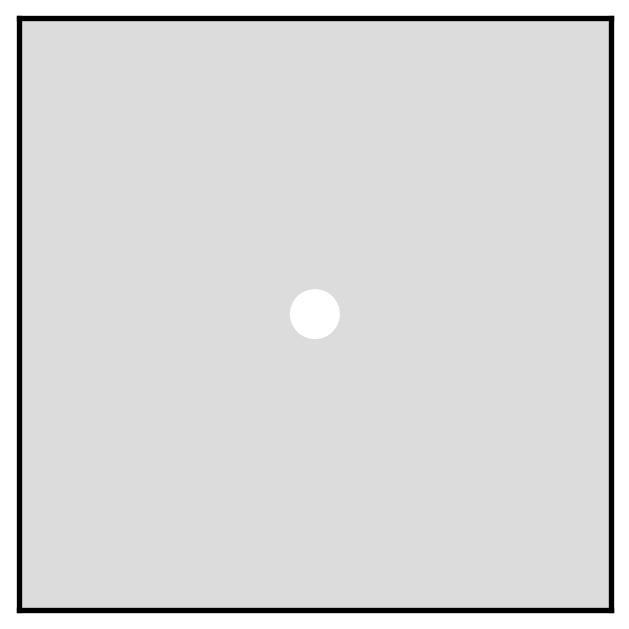

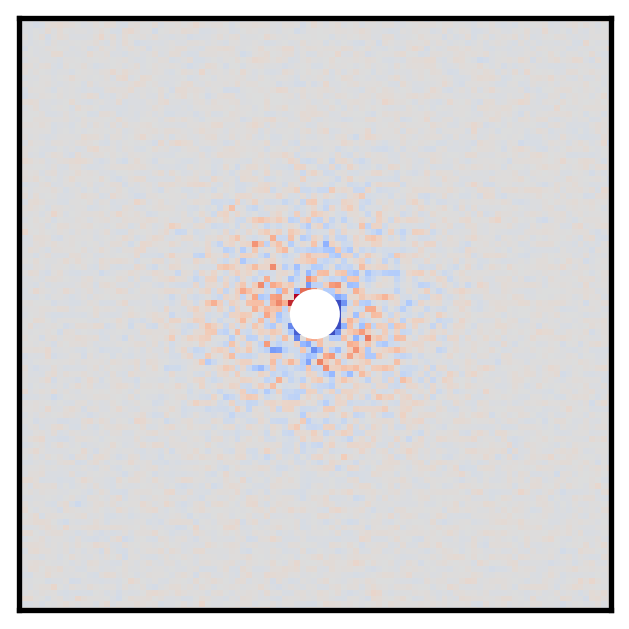

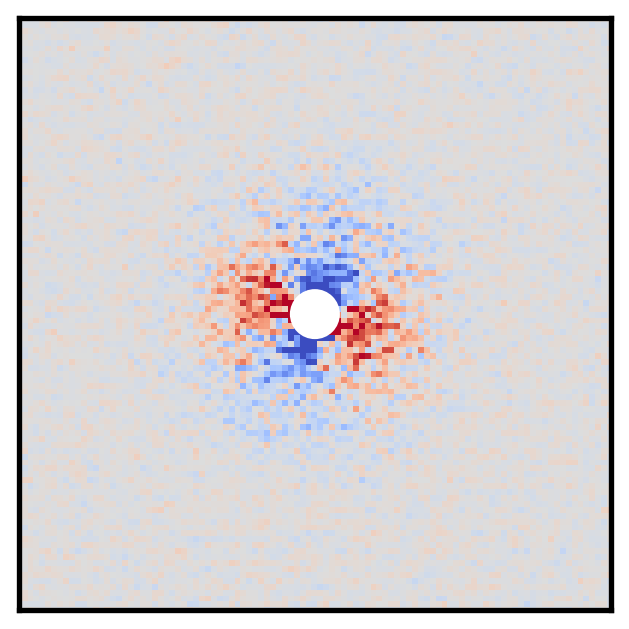

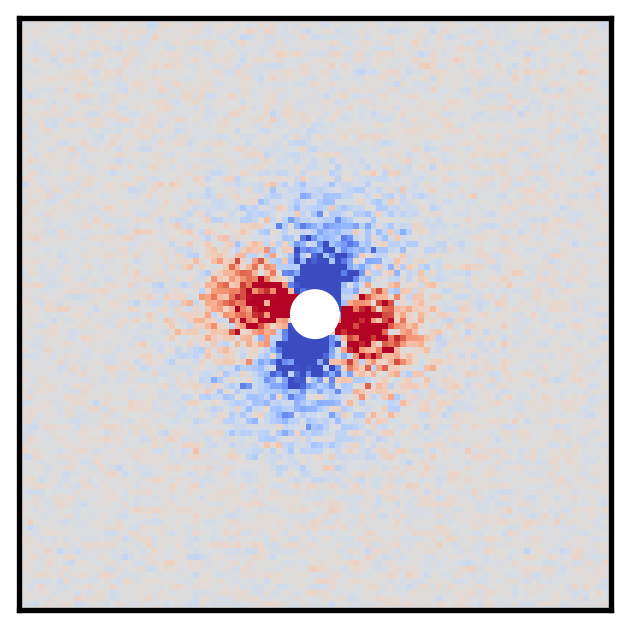

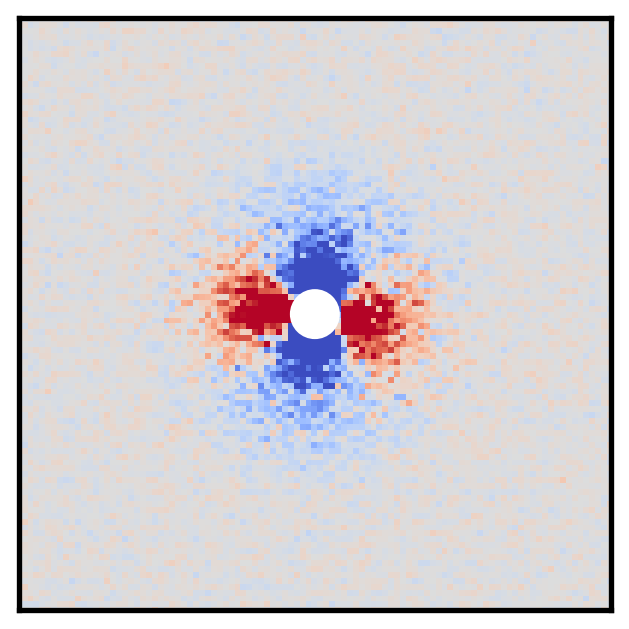

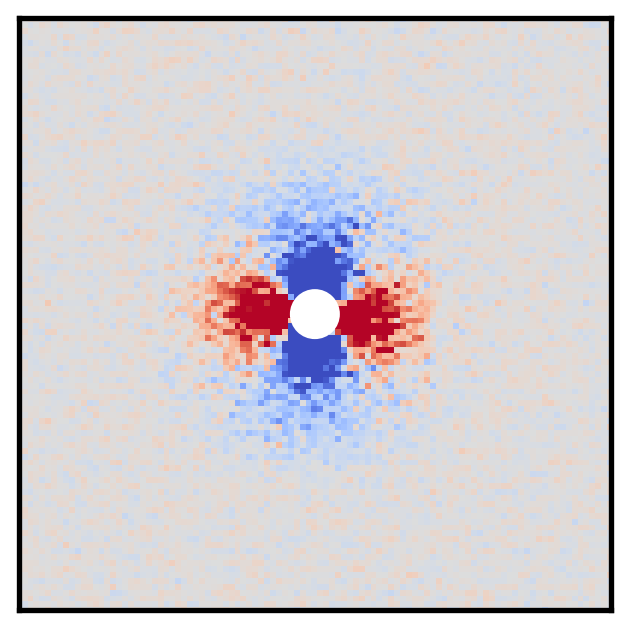

In [5]:
data_0 = data_list[0]
I_0 =  data_0[:, 2]

data_bg = data_list[6]
I_bg =  data_bg[:, 2]

data = data_list[0]

grid_x, grid_y = np.meshgrid(np.linspace(-0.25, 0.25, 101),np.linspace(-0.25, 0.25, 101))

for i, data in enumerate(data_list[:-1]):
    Qx = data[:, 0]
    Qy = data[:, 1]
    delta_I = data[:, 2] - I_0

    grid_I = griddata((Qx, Qy), delta_I, (grid_x, grid_y), method='cubic')

    fig = plt.figure(figsize=(4, 4), dpi=192)
    ax = fig.add_subplot(111)
    ax.pcolor(grid_x, grid_y, grid_I, shading='auto', vmin=-.25, vmax=.25, cmap='coolwarm')

    circle = plt.Circle((0, 0), 0.02, color='white')
    ax.add_patch(circle)
    ax.set_aspect('equal')
    ax.set_xlim(-0.25, 0.25)
    ax.set_ylim(-0.25, 0.25)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    # plt.title(f'Data Set {i}')
    plt.show()

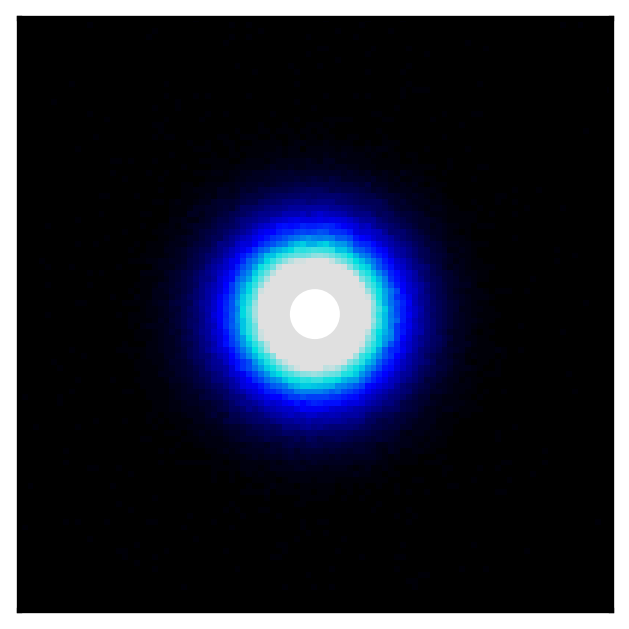

In [6]:
from matplotlib.colors import LinearSegmentedColormap

data = data_list[0]
Qx = data[:, 0]
Qy = data[:, 1]
delta_I = data[:, 2] - I_bg

grid_I = griddata((Qx, Qy), delta_I, (grid_x, grid_y), method='cubic')

colors = ["#000000", "#0000FF", "#00E0E0", "#E0E0E0"]
n_bins = 100  # Discretizes the interpolation into 100 bins
cmap_name = 'custom_cmap'

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

fig = plt.figure(figsize=(4, 4), dpi=192)
ax = fig.add_subplot(111)
ax.pcolor(grid_x, grid_y, grid_I, shading='auto', cmap=custom_cmap, vmin=0, vmax=4)

circle = plt.Circle((0, 0), 0.02, color='white')
ax.add_patch(circle)
ax.set_aspect('equal')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
        spine.set_linewidth(2)
# plt.title(f'Data Set {i}')
plt.show()

In [ ]:
, vmin=0, vmax=8